# Example: Another Look at Sorting - The Quicksort Algorithm
In this example, we compare the average runtime of a recursive [Quicksort](https://en.wikipedia.org/wiki/Quicksort) implementation to our previous [Bubblesort implementation](https://en.wikipedia.org/wiki/Bubble_sort) and [Julia's built-in sort function](https://docs.julialang.org/en/v1/base/sort/#Base.sort) using the [the BenchmarkTools.jl package](https://github.com/JuliaCI/BenchmarkTools.jl).

* [Quicksort](https://en.wikipedia.org/wiki/Quicksort) is a sorting algorithm that works by selecting a `pivot element` and partitioning the remaining elements into two sub-arrays based on their value relative to the pivot. The algorithm then recursively sorts the sub-arrays until they have less than two elements. The choice of pivot is critical for the algorithm's efficiency.

## Setup
This example uses functions encoded in the `src` directory and external third-party packages. In [the `Include.jl` file](src/Include.jl), we load these functions to access them, set some required paths for this example, and load external packages.

In [3]:
include("Include.jl");

Before we get started, let's set up some constants.

In [31]:
max_number_of_trials = 12;
number_of_items_per_trial = [2^i for i ∈ 1:max_number_of_trials] # this is an array comprehension, yet another iteration pattern!

12-element Vector{Int64}:
    2
    4
    8
   16
   32
   64
  128
  256
  512
 1024
 2048
 4096

## Bubblesort

### Check: Let's double-check our original bubblesort implementation
Let's use the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to check that our original implementation of [the `bubblesort(...)` method](src/Compute.jl) works. 
* We'll generate a random vector of integers and compare our sorted answer with the output of the [built-in sort function in Julia](https://docs.julialang.org/en/v1/base/sort/#Base.sort). If this test _fails_, the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) will throw an [AssertionError](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError). Otherwise, nothing happens, and we can go on with our otherwise fruitful and engaging lives.

In [8]:
random_test_vector = rand(0:100,50); # see https://docs.julialang.org/en/v1/stdlib/Random/#Base.rand. Generate 50-element v with [1,100] 
@assert bubblesort(random_test_vector) == sort(random_test_vector); # if this blows up, then our impl is wrong

Ok, so if we get here, all seems to be okay with [our `bubblesort(...)` implementation](src/Compute.jl), so let's see how our code performs as we increase the vector size to be sorted. 

In [10]:
bubble_sort_data = let
    bubble_sort_data = DataFrame();
    for i ∈ eachindex(number_of_items_per_trial)
        size_of_rand_vec_to_sort = number_of_items_per_trial[i];
    
        # run the test with different size vectors -
        test_run = @benchmarkable bubblesort(data) setup=(data=rand(0:number_of_items_per_trial[end], $(size_of_rand_vec_to_sort)));
        tune!(test_run)
        results = run(test_run)
    
        # store the results -
        row = (
            n = size_of_rand_vec_to_sort,
            μ = mean(results.times),
            σ = std(results.times)
        );
        push!(bubble_sort_data, row)
    end
    bubble_sort_data
end

Row,n,μ,σ
,Int64,Float64,Float64
1,2,13.0667,0.798792
2,4,18.4235,0.562237
3,8,31.2528,0.905046
4,16,118.583,2.30092
5,32,401.074,2008.7
6,64,1760.5,33.1911
7,128,7083.76,155.468
8,256,46204.6,1854.19
9,512,1.59511e5,5060.83


## Quicksort

### Check: Let's double-check our quicksort implementation
I've been up for a while, and I'm feeling a little weird. We'd better check our code. Let's use the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to check that our [implementation of `quicksort(...)`](src/Compute.jl) is working. 
* We'll generate a random vector of integers and compare our sorted answer with the output of the [built-in sort function in Julia](https://docs.julialang.org/en/v1/base/sort/#Base.sort). If this test _fails_, the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) will throw an [AssertionError](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError). Otherwise, nothing happens, and we can go on and do great things with our lives (or create a [hedge fund](https://en.wikipedia.org/wiki/Hedge_fund) and spend the rest of my life on a [beach](https://www.cannonbeach.org/)). Whichever.

In [14]:
random_test_vector = rand(0:100,50);
@assert quicksort(random_test_vector) == sort(random_test_vector)

Ok, so if we get here, all seems to be okay with our `quicksort` implementation, so let's see how our code performs as we increase the vector size to be sorted. 

In [16]:
quick_sort_data = let
    
    quick_sort_data = DataFrame();
    for i ∈ eachindex(number_of_items_per_trial)
        size_of_rand_vec_to_sort = number_of_items_per_trial[i];
    
        # run the test with different size vectors -
        test_run = @benchmarkable quicksort(data) setup=(data=rand(0:number_of_items_per_trial[end],$(size_of_rand_vec_to_sort)));
        tune!(test_run)
        results = run(test_run)
    
        # store the results -
        row = (
            n = size_of_rand_vec_to_sort,
            μ = mean(results.times),
            σ = std(results.times)
        );
        push!(quick_sort_data, row)
    end
    quick_sort_data
end

Row,n,μ,σ
,Int64,Float64,Float64
1,2,273.672,2541.93
2,4,566.807,4495.0
3,8,1183.61,8180.54
4,16,3292.0,90101.7
5,32,6325.21,111763.0
6,64,13795.7,2.9378e5
7,128,32665.1,9.14134e5
8,256,52786.7,1.02943e5
9,512,1.04157e5,1.22221e5


## What is the scaling of the Built-in sort function?
Julia provides [sophisticated multi-method sorting capability](https://docs.julialang.org/en/v1/base/sort/#Sorting-Functions). How do our implementations perform against what Julia can offer? This is yet another example of __buy versus build__. You should (almost) always __buy__. But let's see if that is true in this case.

In [18]:
julia_sort_data = let
    julia_sort_data = DataFrame();
    for i ∈ eachindex(number_of_items_per_trial)
        size_of_rand_vec_to_sort = number_of_items_per_trial[i];
    
        # run the test with different size vectors -
        test_run = @benchmarkable sort(data) setup=(data=rand(0:number_of_items_per_trial[end],$(size_of_rand_vec_to_sort)));
        tune!(test_run)
        results = run(test_run)
    
        # store the results -
        row = (
            n = size_of_rand_vec_to_sort,
            μ = mean(results.times),
            σ = std(results.times)
        );
        push!(julia_sort_data, row)
    end
    julia_sort_data
end

Row,n,μ,σ
,Int64,Float64,Float64
1,2,43.6677,52.2824
2,4,47.7319,14.2179
3,8,54.3865,9.6559
4,16,80.2492,11.1057
5,32,179.471,22.517
6,64,400.472,87.6733
7,128,615.185,95.8639
8,256,1430.99,5383.56
9,512,2515.89,9114.5


## Visualize
`Unhide` the code below to see how we plotted the average runtime of each sorting method as a function of the length of the vector $n$.
* __Summary__: For vert short sequences, [our `bubblesort(...)` implementation](src/Compute.jl) is the winner! However, once the sequences become large, [Julia `sort(...)` implementations are the clear winners](https://docs.julialang.org/en/v1/base/sort/#Sorting-Functions). Something is interesting here: [our `quicksort(...)` implementation](src/Compute.jl) seems to have similar scaling behavior to [the built-in `sort(...)` method](https://docs.julialang.org/en/v1/base/sort/#Sorting-Functions).

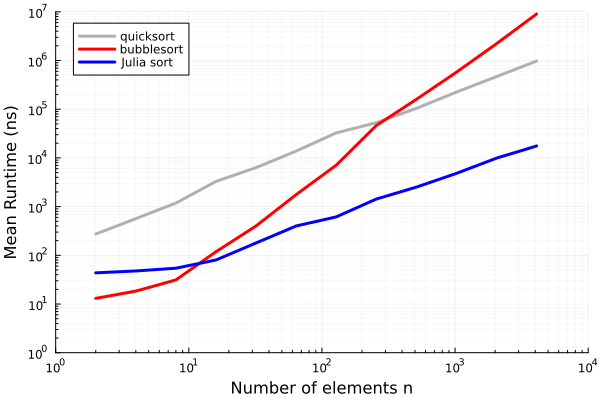

In [20]:
let
    plot(quick_sort_data[:,:n], quick_sort_data[:,:μ], label="quicksort", 
        yscale=:log10, xscale=:log2, lw=3, c=:gray69, minorgrid=true, legend=:topleft)
    plot!(bubble_sort_data[:,:n], bubble_sort_data[:,:μ], label="bubblesort", 
        yscale=:log10, xscale=:log10, lw=3, c=:red)
    plot!(julia_sort_data[:,:n], julia_sort_data[:,:μ], label="Julia sort", 
        yscale=:log10, xscale=:log10, lw=3, c=:blue)
    xlims!(1e+0, 1e+4)
    ylims!(1e+0, 1e+7)
    xlabel!("Number of elements n", fontsize=18)
    ylabel!("Mean Runtime (ns)", fontsize=18)
end